In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import gzip, base64, requests, urllib
import json
import string

import numpy as np

from urbanstats.games.quiz_analysis import plot_sampling_bias

from urbanstats.games.quiz_sampling import (
    compute_geographies_by_type,
    sample_quiz,
    quiz_question_weights,
)

from urbanstats.games.quiz import finish_quiz

/home/kavi/anaconda3/envs/urbanstats-310/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
def short_url(quiz, name):
    compressed = gzip.compress(
        json.dumps(dict(name=name, questions=quiz)).encode("utf-8"),
        mtime=0,
    )
    custom = base64.b64encode(compressed).decode("utf-8")
    after_slash = "quiz.html#mode=custom&quizContent=" + urllib.parse.quote_plus(custom)
    s = requests.post(
        "https://persistent.urbanstats.org/shorten", dict(full_text=after_slash)
    ).json()["shortened"]
    return "https://s.urbanstats.org/s?c=" + s

In [4]:
def custom_quiz(x):
    fq = [
        {**q, "kind": "juxtastat"}
        for q in finish_quiz(sample_quiz(np.random.RandomState(x)))
    ]
    return fq

In [5]:
version = 5
for seed in range(10):
    name = f"{string.ascii_uppercase[seed]} v{version}"
    print(name, "::", short_url(custom_quiz(seed + (version - 1) * 10), name))

computing statistics:   0%|          | 0/40 [00:00<?, ?it/s]

A v5 :: https://s.urbanstats.org/s?c=X3nbJ0V37
B v5 :: https://s.urbanstats.org/s?c=iVNtvBBkoA
C v5 :: https://s.urbanstats.org/s?c=dI1Mplrjp6
D v5 :: https://s.urbanstats.org/s?c=dPfIsqcGWI
E v5 :: https://s.urbanstats.org/s?c=3PolBNLXWG
F v5 :: https://s.urbanstats.org/s?c=SFHMnOMwt
G v5 :: https://s.urbanstats.org/s?c=qeS5oiVafj
H v5 :: https://s.urbanstats.org/s?c=8yg0QY-5Kq
I v5 :: https://s.urbanstats.org/s?c=qNvGUXtu7h
J v5 :: https://s.urbanstats.org/s?c=h1VxbzN-6u


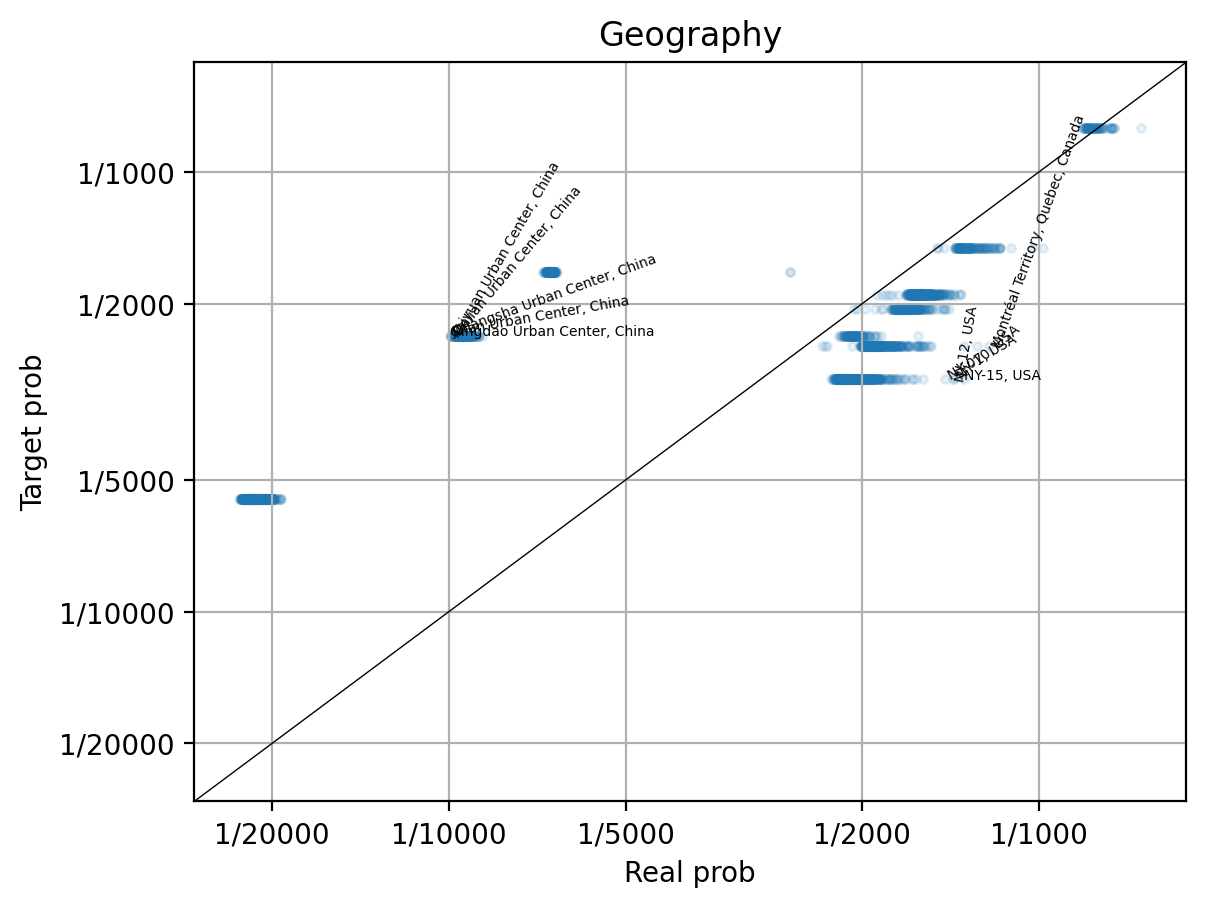

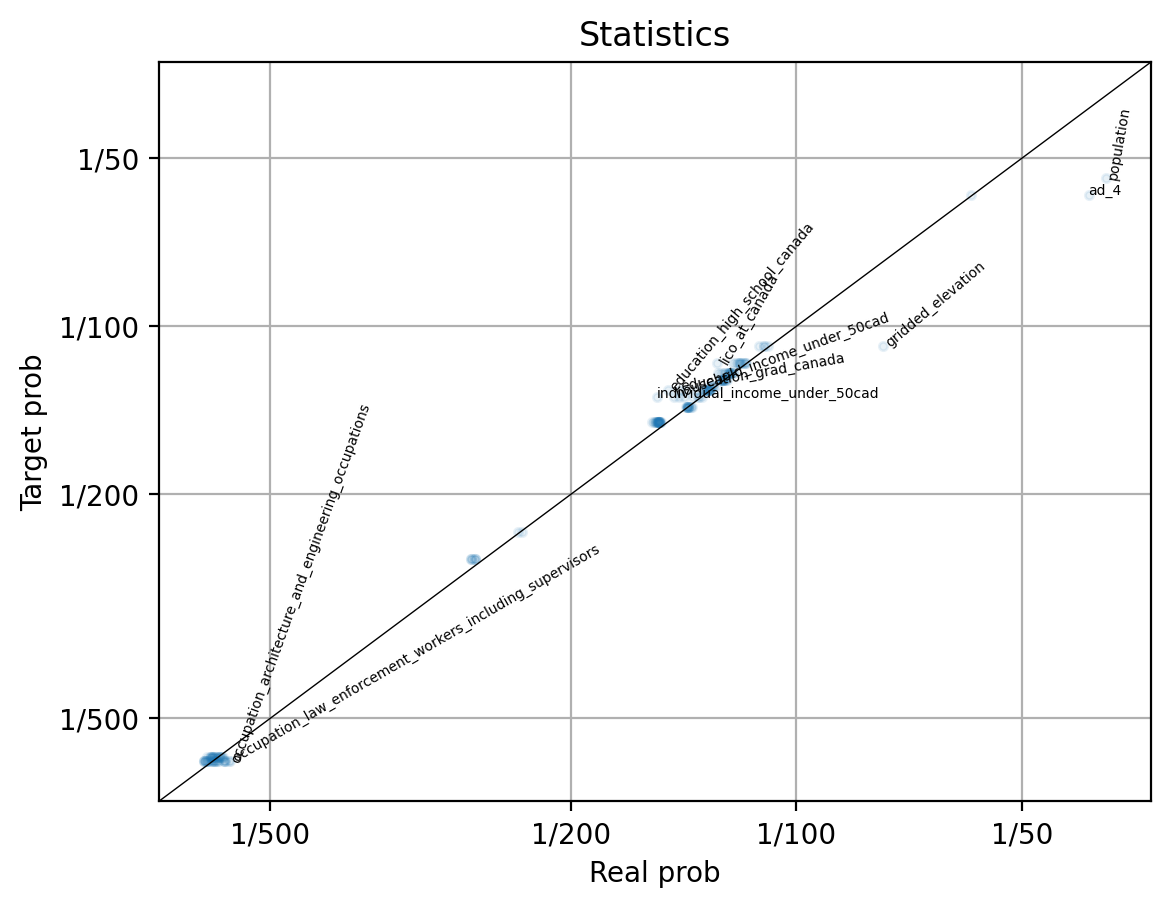

In [6]:
plot_sampling_bias(quiz_question_weights(compute_geographies_by_type()))